##  Bank Marketing

**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a bank. The classification goal is to predict if the prospect will subscribe to a term deposit account (dependent variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same prospect was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Project Description:
The project (Code) analyzes the prior marketing campaign data of a bank and aims to predict whether the prospect will subscribe to fixed-term deposit products the bank is offering. The code cleans the data, imputes the missing values, and analyzes and compares different predictive models. The best predictive model is used for the prediction exercise.

Comments and Explanations (in the form of Markdown) are included in the notebook to improve the readability of the code, to explain the rationale of doing certain steps and to discuss the results and inferences from the executed code.


###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). 

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes

 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)


####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Read Data and Data Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Marketing Project/bank-additional-full.csv', sep=';')
# df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.shape

(41188, 21)

In [6]:
# take a look at the type, number of columns, entries, null values etc..
df.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
# Summary statistics
summary = pd.DataFrame(index = df.columns)
summary['Data type'] = df.dtypes.values
summary['# Nonnull records'] = df.count().values
summary['# Non-zero records'] = df.astype(bool).sum(axis=0)
summary['% Populated'] = round(df.count()/df.shape[0]*100,2)
summary['# Unique values'] = df.nunique().values
summary['Mean'] = round(df.mean(),2)
summary['Std'] = round(df.std(),2)
# summary['Min'] = round(df.min(),2)
# summary['Max'] = round(df.max(),2)
summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


,Data type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std
age,int64,41188,41188,100.0,78,40.02,10.42
job,object,41188,41188,100.0,12,NaN,NaN
marital,object,41188,41188,100.0,4,NaN,NaN
education,object,41188,41188,100.0,8,NaN,NaN
default,object,41188,41188,100.0,3,NaN,NaN
housing,object,41188,41188,100.0,3,NaN,NaN
loan,object,41188,41188,100.0,3,NaN,NaN
contact,object,41188,41188,100.0,2,NaN,NaN
month,object,41188,41188,100.0,10,NaN,NaN
day_of_week,object,41188,41188,100.0,5,NaN,NaN


In [9]:
categorical_fields = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_fields = ['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_fields].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
Y = pd.DataFrame(df['y'])

In [11]:
Y.rename(columns={'y':'label'}, inplace=True)

In [12]:
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [13]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [14]:
goods = df[df['y'] == 1]
bads = df[df['y'] == 0]
num_goods = len(goods)
num_bads = len(bads)
rate = num_goods / len(df)
print('overall response rate is: ', rate)

overall response rate is:  0.11265417111780131


In [15]:
def create_distribution(data, group):
    dist = pd.DataFrame(data.groupby(group).count()['y']).reset_index().sort_values(by='y', ascending=False)
    dist.rename(columns={'y':'count'}, inplace=True)
    dist['%'] = dist['count']/dist['count'].sum()
    dist['label'] = dist[group] + ': ' \
                            + dist['count'].astype(str) \
                            + '(' + round(dist['%']*100,1).astype(str) + '%)'
    return dist

In [16]:
def donut(plotdata,label,title,startangle=0,fontsize=14):
    
    # Plot a donut chart for visualization
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
    labels = label
    plotdata = plotdata

    wedges, texts = ax.pie(plotdata, wedgeprops=dict(width=0.5), startangle=startangle)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),fontsize = fontsize,
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title)

    plt.show()

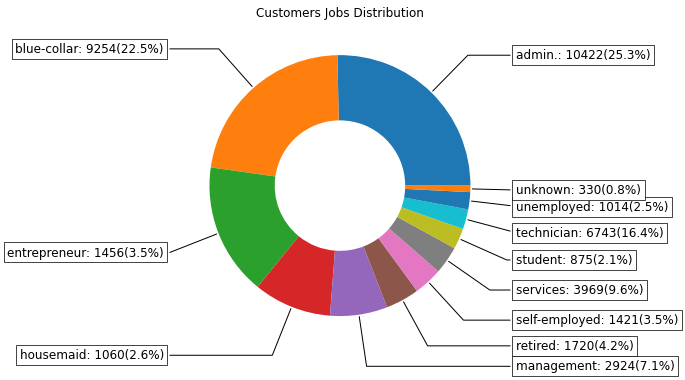

In [17]:
# donut chart
jobs_dist = create_distribution(df,'job')
donut(jobs_dist['count'],jobs_dist['label'], 'Customers Jobs Distribution',fontsize=12)

By observing the plot for pdays, one can find that there is a positive correlation between success rate/lift and pdays. However, value '999' interrupts the positive pattern simplily because the arbitrary number of '999' is chosen to represent no previous campaign record. I changed value "999" to "-99" to hold the positive trend.

Variable "campaign" has a long tail and I capped it at 14, which is around the 99.5th quantile.

Variable "age" shows an interesting pattern against success rate. When customers are under 30, the older the customer is, the less likely he/she will open an account. However, when customers are above 60, the older they are, the more likely they will accept the offer. Therefore I created two variables, one caps age above 30 to 30, and the other caps age below 60 to 60.

In [18]:
df['pdays_mod']=df['pdays'].apply(lambda x: -99 if x==999 else x)
df['campaign_cap']=df['campaign'].clip(upper=20)
df['age_young']=df['age'].clip(upper=30)
df['age_old']=df['age'].clip(lower=60)

Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [19]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [20]:
list(df['education'].unique())

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate']

In [21]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [22]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

In [23]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
df[['job','age']]

,job,age
0,housemaid,56
1,services,57
2,services,37
3,admin.,40
4,services,56
...,...,...
41183,retired,73
41184,blue-collar,46
41185,retired,56
41186,technician,44


In [25]:
df['job'][df['age']<26].value_counts()

student          454
blue-collar      327
admin.           315
services         246
technician       171
self-employed     40
management        38
unemployed        35
entrepreneur      20
housemaid         11
unknown            8
retired            1
Name: job, dtype: int64

In [26]:
df['job'][df['job']=='admin.'].value_counts()

admin.    10422
Name: job, dtype: int64

In [27]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_mod,campaign_cap,age_young,age_old
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,-99,1,30,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,-99,1,30,73
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,-99,1,30,60
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,-99,2,30,60
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,-99,1,30,60


** Inferring education from jobs **: From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

** Inferring jobs from education **: If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

** Inferring jobs from age**: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [28]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['age']<26) & (df['job']=='unknown'), 'job'] = 'student'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'professional.course'
df.loc[(df['education']=='unknown') & (df['job']=='student'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'basic.9y'
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='retired'), 'education'] = 'basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='self-employed'), 'education'] = 'university.degree'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job'] =='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
df.loc[(df['job'] =='unknown') & (df['education']=='university.degree'), 'job'] = 'admin.'

In [29]:
# This will show the 2-d population distribution 
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,university.degree,unknown,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,6038.0,0.0,1.0
blue-collar,2366.0,878,1448.0,4108.0,453.0,94.0,0.0,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,667.0,0.0,2.0
housemaid,516.0,174,77.0,94.0,59.0,139.0,0.0,1.0
management,100.0,298,85.0,166.0,89.0,2186.0,0.0,0.0
retired,713.0,276,75.0,145.0,243.0,286.0,0.0,3.0
self-employed,93.0,118,25.0,220.0,168.0,794.0,0.0,3.0
services,132.0,2832,226.0,388.0,218.0,173.0,0.0,0.0
student,26.0,524,13.0,99.0,43.0,178.0,0.0,0.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

In [30]:
jobhousing=cross_tab(df,'job','housing')
jobloan=cross_tab(df,'job','loan')

In [31]:
jobhousing

,no,yes,unknown
job,,,
admin.,4651,5578,229
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,384,476,23


In [32]:
jobloan

,no,yes,unknown
job,,,
admin.,8512,1717,229
blue-collar,7730,1384,241
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1452,245,44
self-employed,1186,195,40
services,3267,601,101
student,716,144,23


** Imputations for house and loan **: We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [33]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [34]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [35]:
df=fillhousing(df,jobhousing)

In [36]:
df=fillloan(df,jobloan)

In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays_mod',
       'campaign_cap', 'age_young', 'age_old'],
      dtype='object')

In [38]:
display(cross_tab(df,'job','housing'))
display(cross_tab(df,'job','loan'))

,no,yes,unknown
job,,,
admin.,4760,5698,0.0
blue-collar,4479,4876,0.0
entrepreneur,655,801,0.0
housemaid,507,553,0.0
management,1399,1525,0.0
retired,812,929,0.0
self-employed,658,763,0.0
services,1868,2101,0.0
student,394,489,0.0


,no,yes,unknown
job,,,
admin.,8709,1749,0.0
blue-collar,7936,1419,0.0
entrepreneur,1242,214,0.0
housemaid,902,158,0.0
management,2476,448,0.0
retired,1491,250,0.0
self-employed,1222,199,0.0
services,3348,621,0.0
student,733,150,0.0


In [39]:
for catvar in categorical_fields:
    nlim = 50
    if df[catvar].value_counts().min() < nlim:
        idx = df[catvar].value_counts().idxmin()
        val = df[catvar].value_counts().min()
        print(df[catvar].value_counts())
        print("\033[1m"f'For the {catvar} field, the \'{idx}\' entry has {val} observations.'"\033[0m")
        print('')

university.degree      12626
high.school             9832
basic.9y                6499
professional.course     5455
basic.4y                4330
basic.6y                2292
unknown                  136
illiterate                18
Name: education, dtype: int64
For the education field, the 'illiterate' entry has 18 observations.

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
For the default field, the 'yes' entry has 3 observations.

yes        22093
no         19093
unknown        2
Name: housing, dtype: int64
For the housing field, the 'unknown' entry has 2 observations.

no         34784
yes         6402
unknown        2
Name: loan, dtype: int64
For the loan field, the 'unknown' entry has 2 observations.



In [40]:
# Imputing 'illiterate' for jobs
# Reason that for purposes of modeling, illiterate may be grouped with unknown
df['education'][df['education']=='unknown'] = 'illiterate'
df['education'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


university.degree      12626
high.school             9832
basic.9y                6499
professional.course     5455
basic.4y                4330
basic.6y                2292
illiterate               154
Name: education, dtype: int64

In [41]:
# Imputing the 'default' field
# Given only 3 options, without outside information, may be reasonable to group 'unknown' and 'yes'
df['default'][df['default']=='unknown'] = 'yes'
df['default'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


no     32588
yes     8600
Name: default, dtype: int64

In [42]:
# Imputing the 'housing' field
df['housing'][df['housing']=='unknown'] = 'yes'
df['housing'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


yes    22095
no     19093
Name: housing, dtype: int64

In [43]:
# Imputing the 'loan' field
df['loan'][df['loan']=='unknown'] = 'no'
df['loan'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


no     34786
yes     6402
Name: loan, dtype: int64

In [44]:
for catvar in categorical_fields:
    nlim = 50
    if df[catvar].value_counts().min() < nlim:
        idx = df[catvar].value_counts().idxmin()
        val = df[catvar].value_counts().min()
        print(df[catvar].value_counts())
        print("\033[1m"f'For the {catvar} field, the \'{idx}\' entry has {val} observations.'"\033[0m")
        print('')
else: print("\033[1m"f'No category for each categorical field in data contains fewer than {nlim} records.'"\033[0m")

No category for each categorical field in data contains fewer than 50 records.


In [45]:
df.shape

(41188, 25)

In [46]:
df.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,yes,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [47]:
# Summary statistics
summary = pd.DataFrame(index = df.columns)
summary['Data type'] = df.dtypes.values
summary['# Nonnull records'] = df.count().values
summary['# Non-zero records'] = df.astype(bool).sum(axis=0)
summary['% Populated'] = round(df.count()/df.shape[0]*100,2)
summary['# Unique values'] = df.nunique().values
summary['Mean'] = round(df.mean(),2)
summary['Std'] = round(df.std(),2)
# summary['Min'] = round(df.min(),2)
# summary['Max'] = round(df.max(),2)
summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


,Data type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std
age,int64,41188,41188,100.0,78,40.02,10.42
job,object,41188,41188,100.0,12,NaN,NaN
marital,object,41188,41188,100.0,4,NaN,NaN
education,object,41188,41188,100.0,7,NaN,NaN
default,object,41188,41188,100.0,2,NaN,NaN
housing,object,41188,41188,100.0,2,NaN,NaN
loan,object,41188,41188,100.0,2,NaN,NaN
contact,object,41188,41188,100.0,2,NaN,NaN
month,object,41188,41188,100.0,10,NaN,NaN
day_of_week,object,41188,41188,100.0,5,NaN,NaN


# Categorical Data Encoding

In [48]:
# # Drop y for most variable creation steps
df.drop(columns = ['y'], inplace=True)
numerical_fields = ['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx','euribor3m','nr.employed']

In [49]:
print(categorical_fields)
categorical_fields_binary = ['default','housing','loan','contact']  # do one-hot encoding for binary variables
categorical_fields_multiple = [i for i in categorical_fields if i not in categorical_fields_binary]  
# do target encoding for multi-value categorical variabels
print(categorical_fields_binary)
print(categorical_fields_multiple)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['default', 'housing', 'loan', 'contact']
['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']


## One-hot Encoding

In [50]:
three_loan = ['default','housing','loan']  # take a look at the 3 loan col, and calculate the jaccard similarity among them
cat_data1 = df[three_loan].copy()
for i in three_loan:
  print(df[i].unique())
  df[i] = df[i].map(lambda row: 1 if row == 'yes' else 0)
df[three_loan]

['no' 'yes']
['no' 'yes']
['no' 'yes']


,default,housing,loan
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,0
4,0,0,1
...,...,...,...
41183,0,1,0
41184,0,0,0
41185,0,1,0
41186,0,0,0


In [51]:
print(df.contact.value_counts())
cat_data1 = pd.concat([cat_data1, df[['contact']]],axis=1)
# one-hot encoding for contact(binary variable)
df['contact'] = df['contact'].map(lambda row: 1 if row == 'telephone' else 0)
df[['contact']]

cellular     26144
telephone    15044
Name: contact, dtype: int64


,contact
0,1
1,1
2,1
3,1
4,1
...,...
41183,0
41184,0
41185,0
41186,0


## Target Encoding

In [52]:
df.shape

(41188, 24)

In [53]:
# # put the dependent variable y back into the main data to create the target encoded variables
df['y'] = Y

In [54]:
# categorical_fields_orig = categorical_fields

In [55]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 101)

In [56]:
# this is 1-d target encoding

def target_encode(df, categorical_fields):
    data = df.copy()
    nmid = 30
    pd.set_option('mode.chained_assignment', None)
    y_avg = data['y'].mean()
    for catvar in categorical_fields:
      y_catvar = data.groupby(catvar)['y'].mean()
      num_instances_catvar = data.groupby(catvar).size()
      y_catvar_smooth = y_avg + (y_catvar - y_avg) / (1 + np.exp(-(num_instances_catvar-nmid)/(.5 * nmid))) 
      data[catvar+'_tgt'] = data[catvar].map(y_catvar_smooth).tolist()
    cat_data = data[categorical_fields]
    data.drop(columns=categorical_fields, inplace=True)
    return data, cat_data

In [57]:
# X_train, X_test, cat_X_train, cat_X_test = target_encode(df, X_train, X_test, categorical_fields, categorical_fields_orig)
# X_train.shape
df, cat_data2 = target_encode(df, categorical_fields_multiple)
df

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,campaign_cap,age_young,age_old,y,job_tgt,marital_tgt,education_tgt,month_tgt,day_of_week_tgt,poutcome_tgt
0,56,0,0,0,1,261,1,999,0,1.1,...,1,30,60,0,0.100000,0.101573,0.109469,0.064347,0.099483,0.088322
1,57,1,0,0,1,149,1,999,0,1.1,...,1,30,60,0,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322
2,37,0,1,0,1,226,1,999,0,1.1,...,1,30,60,0,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322
3,40,0,0,0,1,151,1,999,0,1.1,...,1,30,60,0,0.129757,0.101573,0.082024,0.064347,0.099483,0.088322
4,56,0,0,1,1,307,1,999,0,1.1,...,1,30,60,0,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,0,334,1,999,0,-1.1,...,1,30,73,1,0.253877,0.101573,0.113657,0.101439,0.108087,0.088322
41184,46,0,0,0,0,383,1,999,0,-1.1,...,1,30,60,0,0.068840,0.101573,0.113657,0.101439,0.108087,0.088322
41185,56,0,1,0,0,189,2,999,0,-1.1,...,2,30,60,0,0.253877,0.101573,0.137336,0.101439,0.108087,0.088322
41186,44,0,0,0,0,442,1,999,0,-1.1,...,1,30,60,1,0.108248,0.101573,0.113657,0.101439,0.108087,0.088322


In [58]:
# df = pd.concat([X_train,X_test])

In [59]:
# cat_data = pd.concat([cat_X_train, cat_X_test])
cat_data = pd.concat([cat_data1, cat_data2],axis=1)
cat_data

,default,housing,loan,contact,job,marital,education,month,day_of_week,poutcome
0,no,no,no,telephone,housemaid,married,basic.4y,may,mon,nonexistent
1,yes,no,no,telephone,services,married,high.school,may,mon,nonexistent
2,no,yes,no,telephone,services,married,high.school,may,mon,nonexistent
3,no,no,no,telephone,admin.,married,basic.6y,may,mon,nonexistent
4,no,no,yes,telephone,services,married,high.school,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,no,yes,no,cellular,retired,married,professional.course,nov,fri,nonexistent
41184,no,no,no,cellular,blue-collar,married,professional.course,nov,fri,nonexistent
41185,no,yes,no,cellular,retired,married,university.degree,nov,fri,nonexistent
41186,no,no,no,cellular,technician,married,professional.course,nov,fri,nonexistent


In [60]:
df.fillna(df.mean(), inplace=True)

In [61]:
# cat_data = cat_data.sort_index()

In [62]:
# Remove numbers that are too large (infinite)
def clean_dataset(df):
    indices_to_keep = ~df.isin([np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64).sort_index(), indices_to_keep.index

In [63]:
df, indices = clean_dataset(df)
indices = list(clean_dataset(df)[1])
# Y = Y[Y.index.isin(indices)].sort_index()

In [64]:
df

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,campaign_cap,age_young,age_old,y,job_tgt,marital_tgt,education_tgt,month_tgt,day_of_week_tgt,poutcome_tgt
0,56.0,0.0,0.0,0.0,1.0,261.0,1.0,999.0,0.0,1.1,...,1.0,30.0,60.0,0.0,0.100000,0.101573,0.109469,0.064347,0.099483,0.088322
1,57.0,1.0,0.0,0.0,1.0,149.0,1.0,999.0,0.0,1.1,...,1.0,30.0,60.0,0.0,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322
2,37.0,0.0,1.0,0.0,1.0,226.0,1.0,999.0,0.0,1.1,...,1.0,30.0,60.0,0.0,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322
3,40.0,0.0,0.0,0.0,1.0,151.0,1.0,999.0,0.0,1.1,...,1.0,30.0,60.0,0.0,0.129757,0.101573,0.082024,0.064347,0.099483,0.088322
4,56.0,0.0,0.0,1.0,1.0,307.0,1.0,999.0,0.0,1.1,...,1.0,30.0,60.0,0.0,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,0.0,1.0,0.0,0.0,334.0,1.0,999.0,0.0,-1.1,...,1.0,30.0,73.0,1.0,0.253877,0.101573,0.113657,0.101439,0.108087,0.088322
41184,46.0,0.0,0.0,0.0,0.0,383.0,1.0,999.0,0.0,-1.1,...,1.0,30.0,60.0,0.0,0.068840,0.101573,0.113657,0.101439,0.108087,0.088322
41185,56.0,0.0,1.0,0.0,0.0,189.0,2.0,999.0,0.0,-1.1,...,2.0,30.0,60.0,0.0,0.253877,0.101573,0.137336,0.101439,0.108087,0.088322
41186,44.0,0.0,0.0,0.0,0.0,442.0,1.0,999.0,0.0,-1.1,...,1.0,30.0,60.0,1.0,0.108248,0.101573,0.113657,0.101439,0.108087,0.088322


In [65]:
# Summary statistics
summary = pd.DataFrame(index = df.columns)
summary['Data type'] = df.dtypes.values
summary['# Nonnull records'] = df.count().values
summary['# Non-zero records'] = df.astype(bool).sum(axis=0)
summary['% Populated'] = round(df.count()/df.shape[0]*100,2)
summary['# Unique values'] = df.nunique().values
summary['Mean'] = round(df.mean(),2)
summary['Std'] = round(df.std(),2)
# summary['Min'] = round(df.min(),2)
# summary['Max'] = round(df.max(),2)
summary

,Data type,# Nonnull records,# Non-zero records,% Populated,# Unique values,Mean,Std
age,float64,41188,41188,100.0,78,40.02,10.42
default,float64,41188,8600,100.0,2,0.21,0.41
housing,float64,41188,22095,100.0,2,0.54,0.50
loan,float64,41188,6402,100.0,2,0.16,0.36
contact,float64,41188,15044,100.0,2,0.37,0.48
duration,float64,41188,41184,100.0,1544,258.29,259.28
campaign,float64,41188,41188,100.0,42,2.57,2.77
pdays,float64,41188,41173,100.0,27,962.48,186.91
previous,float64,41188,5625,100.0,8,0.17,0.49
emp.var.rate,float64,41188,41188,100.0,10,0.08,1.57


# K-means

In [66]:
# Standardize the value
# cols = ['age','job_tgt','marital_tgt','education_tgt','default_tgt','housing_tgt','loan_tgt']
cols = ['age','job_tgt','marital_tgt','education_tgt']
for i in cols:
    df[i +'_z'] = (df[i] - df[i].mean())/ df[i].std()
df.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,job_tgt,marital_tgt,education_tgt,month_tgt,day_of_week_tgt,poutcome_tgt,age_z,job_tgt_z,marital_tgt_z,education_tgt_z
0,56.0,0.0,0.0,0.0,1.0,261.0,1.0,999.0,0.0,1.1,...,0.100000,0.101573,0.109469,0.064347,0.099483,0.088322,1.533016,-0.257374,-0.642328,-0.150698
1,57.0,1.0,0.0,0.0,1.0,149.0,1.0,999.0,0.0,1.1,...,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322,1.628973,-0.636073,-0.642328,0.006661
2,37.0,0.0,1.0,0.0,1.0,226.0,1.0,999.0,0.0,1.1,...,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322,-0.290182,-0.636073,-0.642328,0.006661
3,40.0,0.0,0.0,0.0,1.0,151.0,1.0,999.0,0.0,1.1,...,0.129757,0.101573,0.082024,0.064347,0.099483,0.088322,-0.002309,0.347857,-0.642328,-1.449087
4,56.0,0.0,0.0,1.0,1.0,307.0,1.0,999.0,0.0,1.1,...,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322,1.533016,-0.636073,-0.642328,0.006661


In [67]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pdays_mod', 'campaign_cap', 'age_young',
       'age_old', 'y', 'job_tgt', 'marital_tgt', 'education_tgt', 'month_tgt',
       'day_of_week_tgt', 'poutcome_tgt', 'age_z', 'job_tgt_z',
       'marital_tgt_z', 'education_tgt_z'],
      dtype='object')

In [68]:
import plotly.graph_objs as go
import plotly.offline as py

def plot_correlation(df):
    """Plot correlation matrix for numerical variables."""
    #correlation
    correlation = df.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)

    #Plotting
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale = "Viridis",
                       colorbar   = dict(title = "Pearson Correlation coefficient",
                                         titleside = "right"
                                        ) ,
                      )

    layout = go.Layout(dict(title = "Correlation Matrix for variables",
                            autosize = False,
                            height  = 800,
                            width   = 900,
                            margin  = dict(r = 0 ,l = 210,
                                           t = 25,b = 210,
                                          ),
                            yaxis   = dict(tickfont = dict(size = 15)),
                            xaxis   = dict(tickfont = dict(size = 15))
                           )
                      )

    data = [trace]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [69]:
# According to the correlation matrix, there is no strong relationship among features used for K-means 
plot_correlation(df[['age','job_tgt','marital_tgt','education_tgt','default','housing','loan']])

In [70]:
# The Jaccard Similarity also show that three loan columns do not have strong relationship
# What Sanji said in the class is not true!!!
from sklearn.metrics import jaccard_score
from itertools import combinations
for i,j in combinations(categorical_fields_binary,2):
  print(f'The Jaccard Similarity between {i} and {j}: {jaccard_score(df[i],df[j])}')

The Jaccard Similarity between default and housing: 0.1707605461896407
The Jaccard Similarity between default and loan: 0.09639698896440839
The Jaccard Similarity between default and contact: 0.21807222708773377
The Jaccard Similarity between housing and loan: 0.15251152632856102
The Jaccard Similarity between housing and contact: 0.24289682406880628
The Jaccard Similarity between loan and contact: 0.11744476865360567


In [71]:
# We will start with k=2 and compute the Sum of Squares
SST= []
for i in range(1,21):
    model = KMeans(n_clusters = i, random_state = 10)
    # model.fit(df[['age_z','job_tgt_z','marital_tgt_z','education_tgt_z','default_tgt_z','housing_tgt_z','loan_tgt_z']])
    model.fit(df[['age_z','job_tgt_z','marital_tgt_z','education_tgt_z','default','housing','loan']])
    SST.append(model.inertia_)


# compute sum of squares


In [72]:
# now, let's do it for all values of k between 2 and 10

#define an empty list to hold all sum of squares (ss)
res = pd.DataFrame({'k':list(range(1,21)),'SSTotal':SST})
res


,k,SSTotal
0,1,187201.544892
1,2,137581.791539
2,3,110198.984238
3,4,86728.466820
4,5,75126.426924
5,6,64633.856368
6,7,59943.805375
7,8,52893.110902
8,9,49812.847505
9,10,47101.765863


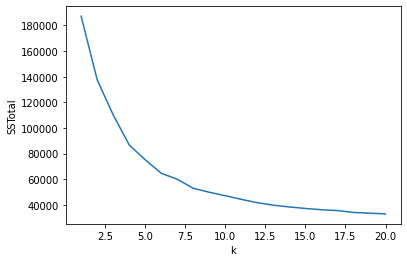

In [73]:
sns.lineplot(data = res, x = 'k',y ='SSTotal')

In [74]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=1)

In [75]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pdays_mod', 'campaign_cap', 'age_young',
       'age_old', 'y', 'job_tgt', 'marital_tgt', 'education_tgt', 'month_tgt',
       'day_of_week_tgt', 'poutcome_tgt', 'age_z', 'job_tgt_z',
       'marital_tgt_z', 'education_tgt_z'],
      dtype='object')

In [76]:
df

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,job_tgt,marital_tgt,education_tgt,month_tgt,day_of_week_tgt,poutcome_tgt,age_z,job_tgt_z,marital_tgt_z,education_tgt_z
0,56.0,0.0,0.0,0.0,1.0,261.0,1.0,999.0,0.0,1.1,...,0.100000,0.101573,0.109469,0.064347,0.099483,0.088322,1.533016,-0.257374,-0.642328,-0.150698
1,57.0,1.0,0.0,0.0,1.0,149.0,1.0,999.0,0.0,1.1,...,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322,1.628973,-0.636073,-0.642328,0.006661
2,37.0,0.0,1.0,0.0,1.0,226.0,1.0,999.0,0.0,1.1,...,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322,-0.290182,-0.636073,-0.642328,0.006661
3,40.0,0.0,0.0,0.0,1.0,151.0,1.0,999.0,0.0,1.1,...,0.129757,0.101573,0.082024,0.064347,0.099483,0.088322,-0.002309,0.347857,-0.642328,-1.449087
4,56.0,0.0,0.0,1.0,1.0,307.0,1.0,999.0,0.0,1.1,...,0.081381,0.101573,0.112795,0.064347,0.099483,0.088322,1.533016,-0.636073,-0.642328,0.006661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,0.0,1.0,0.0,0.0,334.0,1.0,999.0,0.0,-1.1,...,0.253877,0.101573,0.113657,0.101439,0.108087,0.088322,3.164298,2.872336,-0.642328,0.047453
41184,46.0,0.0,0.0,0.0,0.0,383.0,1.0,999.0,0.0,-1.1,...,0.068840,0.101573,0.113657,0.101439,0.108087,0.088322,0.573438,-0.891134,-0.642328,0.047453
41185,56.0,0.0,1.0,0.0,0.0,189.0,2.0,999.0,0.0,-1.1,...,0.253877,0.101573,0.137336,0.101439,0.108087,0.088322,1.533016,2.872336,-0.642328,1.167677
41186,44.0,0.0,0.0,0.0,0.0,442.0,1.0,999.0,0.0,-1.1,...,0.108248,0.101573,0.113657,0.101439,0.108087,0.088322,0.381522,-0.089614,-0.642328,0.047453


In [77]:
num_cluster = 6
kmeans = KMeans(n_clusters = num_cluster, random_state = 0, max_iter=2000, tol=0.00000001)
# kmeans.fit(df[['age_z','job_tgt_z','marital_tgt_z','education_tgt_z','default_tgt_z','housing_tgt_z','loan_tgt_z']])
kmeans.fit(df[['age_z','job_tgt_z','marital_tgt_z','education_tgt_z','default','housing','loan']])

KMeans(max_iter=2000, n_clusters=6, random_state=0, tol=1e-08)

In [78]:
df['cluster'] = kmeans.labels_

In [79]:
df

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,marital_tgt,education_tgt,month_tgt,day_of_week_tgt,poutcome_tgt,age_z,job_tgt_z,marital_tgt_z,education_tgt_z,cluster
0,56.0,0.0,0.0,0.0,1.0,261.0,1.0,999.0,0.0,1.1,...,0.101573,0.109469,0.064347,0.099483,0.088322,1.533016,-0.257374,-0.642328,-0.150698,2
1,57.0,1.0,0.0,0.0,1.0,149.0,1.0,999.0,0.0,1.1,...,0.101573,0.112795,0.064347,0.099483,0.088322,1.628973,-0.636073,-0.642328,0.006661,2
2,37.0,0.0,1.0,0.0,1.0,226.0,1.0,999.0,0.0,1.1,...,0.101573,0.112795,0.064347,0.099483,0.088322,-0.290182,-0.636073,-0.642328,0.006661,0
3,40.0,0.0,0.0,0.0,1.0,151.0,1.0,999.0,0.0,1.1,...,0.101573,0.082024,0.064347,0.099483,0.088322,-0.002309,0.347857,-0.642328,-1.449087,4
4,56.0,0.0,0.0,1.0,1.0,307.0,1.0,999.0,0.0,1.1,...,0.101573,0.112795,0.064347,0.099483,0.088322,1.533016,-0.636073,-0.642328,0.006661,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,0.0,1.0,0.0,0.0,334.0,1.0,999.0,0.0,-1.1,...,0.101573,0.113657,0.101439,0.108087,0.088322,3.164298,2.872336,-0.642328,0.047453,3
41184,46.0,0.0,0.0,0.0,0.0,383.0,1.0,999.0,0.0,-1.1,...,0.101573,0.113657,0.101439,0.108087,0.088322,0.573438,-0.891134,-0.642328,0.047453,2
41185,56.0,0.0,1.0,0.0,0.0,189.0,2.0,999.0,0.0,-1.1,...,0.101573,0.137336,0.101439,0.108087,0.088322,1.533016,2.872336,-0.642328,1.167677,3
41186,44.0,0.0,0.0,0.0,0.0,442.0,1.0,999.0,0.0,-1.1,...,0.101573,0.113657,0.101439,0.108087,0.088322,0.381522,-0.089614,-0.642328,0.047453,2


In [80]:
df_final = pd.concat([cat_data[['job','marital','education','default','housing','loan']], df[['age','y','cluster']]],axis=1)
df_final

,job,marital,education,default,housing,loan,age,y,cluster
0,housemaid,married,basic.4y,no,no,no,56.0,0.0,2
1,services,married,high.school,yes,no,no,57.0,0.0,2
2,services,married,high.school,no,yes,no,37.0,0.0,0
3,admin.,married,basic.6y,no,no,no,40.0,0.0,4
4,services,married,high.school,no,no,yes,56.0,0.0,2
...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,73.0,1.0,3
41184,blue-collar,married,professional.course,no,no,no,46.0,0.0,2
41185,retired,married,university.degree,no,yes,no,56.0,0.0,3
41186,technician,married,professional.course,no,no,no,44.0,1.0,2


In [81]:
cluster0 = df_final[df_final['cluster'] == 0]
cluster0


,job,marital,education,default,housing,loan,age,y,cluster
2,services,married,high.school,no,yes,no,37.0,0.0,0
20,unemployed,married,high.school,no,no,no,30.0,0.0,0
24,admin.,married,high.school,no,yes,no,37.0,0.0,0
25,technician,married,university.degree,no,no,yes,35.0,0.0,0
36,services,married,high.school,no,no,no,34.0,0.0,0
...,...,...,...,...,...,...,...,...,...
41168,entrepreneur,married,university.degree,no,no,no,38.0,0.0,0
41170,management,divorced,university.degree,no,yes,no,40.0,0.0,0
41176,housemaid,divorced,high.school,no,yes,yes,38.0,0.0,0
41180,admin.,married,university.degree,no,no,no,36.0,0.0,0


In [82]:
print(cluster0.job.value_counts())
print(cluster0.marital.value_counts())
print(cluster0.education.value_counts())
print(cluster0.default.value_counts())
print(cluster0.housing.value_counts())
print(cluster0.loan.value_counts())
print(cluster0.age.describe())


admin.           3933
technician       2490
services         1414
blue-collar      1337
management       1084
entrepreneur      492
self-employed     442
unemployed        338
housemaid         280
unknown            23
Name: job, dtype: int64
married     10145
divorced     1688
Name: marital, dtype: int64
university.degree      4805
high.school            3835
professional.course    2146
basic.4y               1016
illiterate               31
Name: education, dtype: int64
no     10205
yes     1628
Name: default, dtype: int64
yes    6333
no     5500
Name: housing, dtype: int64
no     9979
yes    1854
Name: loan, dtype: int64
count    11833.000000
mean        35.146455
std          4.444052
min         20.000000
25%         32.000000
50%         35.000000
75%         39.000000
max         44.000000
Name: age, dtype: float64


In [83]:
# job
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.job.value_counts(normalize = True)*100)
  print(f'cluster{i}\n',res,'\n\n')

cluster0
                      job
admin.         33.237556
technician     21.042846
services       11.949632
blue-collar    11.298910
management      9.160821
entrepreneur    4.157864
self-employed   3.735316
unemployed      2.856418
housemaid       2.366264
unknown         0.194372 


cluster1
                      job
admin.         37.411537
technician     22.161900
blue-collar    15.540475
services       10.867668
management      4.760058
self-employed   3.596704
unemployed      2.433349
entrepreneur    1.900145
housemaid       1.066408
unknown         0.261755 


cluster2
                      job
admin.         23.420115
blue-collar    18.062007
technician     17.284217
management     12.174571
services       10.316517
entrepreneur    5.509344
housemaid       5.455331
self-employed   4.105002
unemployed      2.549422
unknown         1.123474 


cluster3
                job
retired  99.941555
student   0.058445 


cluster4
                      job
blue-collar    66.252270
admin.

In [84]:
# marital
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.marital.value_counts(normalize = True)*100)
  print(f'cluster{i}\n',res,'\n\n')

cluster0
             marital
married   85.734809
divorced  14.265191 


cluster1
            marital
single   99.292293
unknown   0.707707 


cluster2
             marital
married   79.993518
divorced  19.282705
single     0.723777 


cluster3
             marital
married   74.926943
divorced  20.572764
single     4.208065
unknown    0.292227 


cluster4
             marital
married   84.495041
divorced  10.867440
single     4.623551
unknown    0.013968 


cluster5
             marital
single    93.756846
married    5.147864
divorced   0.985761
unknown    0.109529 




In [85]:
#Education summary
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.education.value_counts(normalize = True)*100)
  print(f'cluster{i}\n',res,'\n\n')

cluster0
                      education
university.degree    40.606778
high.school          32.409364
professional.course  18.135722
basic.4y              8.586157
illiterate            0.261979 


cluster1
                      education
university.degree    41.890451
high.school          27.503635
professional.course  13.853611
basic.9y              9.801260
basic.4y              3.974794
basic.6y              2.762967
illiterate            0.213282 


cluster2
                      education
university.degree    32.796802
high.school          25.494221
basic.4y             23.387707
professional.course  17.219402
illiterate            1.058658
basic.9y              0.021605
basic.6y              0.021605 


cluster3
                      education
basic.4y             41.262420
university.degree    16.656926
high.school          15.721800
professional.course  14.026885
basic.9y              8.240795
basic.6y              3.915839
illiterate            0.175336 


cluster4
         

In [86]:
# default
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.default.value_counts(normalize = True)*100)
  print(f'cluster{i}\n',res,'\n\n')


cluster0
        default
no   86.241866
yes  13.758134 


cluster1
        default
no   88.385846
yes  11.614154 


cluster2
       default
no   67.99179
yes  32.00821 


cluster3
        default
no   77.440094
yes  22.559906 


cluster4
        default
no   67.732924
yes  32.267076 


cluster5
        default
no   87.404162
yes  12.595838 




In [87]:
# housing
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.housing.value_counts(normalize = True)*100)
  print(f'cluster{i}\n',res,'\n\n')

cluster0
        housing
yes  53.519817
no   46.480183 


cluster1
        housing
yes  54.726127
no   45.273873 


cluster2
        housing
yes  53.224587
no   46.775413 


cluster3
        housing
yes  53.302162
no   46.697838 


cluster4
        housing
yes  52.688923
no   47.311077 


cluster5
        housing
yes  55.421687
no   44.578313 




In [88]:
# loan
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.loan.value_counts(normalize = True)*100)
  print(f'cluster{i}\n',res,'\n\n')

cluster0
           loan
no   84.331953
yes  15.668047 


cluster1
           loan
no   84.294716
yes  15.705284 


cluster2
           loan
no   84.001296
yes  15.998704 


cluster3
           loan
no   85.622443
yes  14.377557 


cluster4
           loan
no   85.375052
yes  14.624948 


cluster5
          loan
no   83.13253
yes  16.86747 




In [89]:
# age
for i in range(num_cluster):
  cluster = df_final[df_final['cluster'] == i]
  res = pd.DataFrame(cluster.age.describe())
  print(f'cluster{i}\n',res,'\n\n')

cluster0
                 age
count  11833.000000
mean      35.146455
std        4.444052
min       20.000000
25%       32.000000
50%       35.000000
75%       39.000000
max       44.000000 


cluster1
                 age
count  10315.000000
mean      33.069510
std        6.485759
min       20.000000
25%       29.000000
50%       32.000000
75%       36.000000
max       58.000000 


cluster2
                age
count  9257.000000
mean     50.594901
std       5.338244
min      41.000000
25%      46.000000
50%      50.000000
75%      54.000000
max      85.000000 


cluster3
                age
count  1711.000000
mean     62.532437
std       9.996314
min      36.000000
25%      56.000000
50%      59.000000
75%      69.000000
max      98.000000 


cluster4
                age
count  7159.000000
mean     40.814220
std       8.228988
min      21.000000
25%      35.000000
50%      40.000000
75%      47.000000
max      69.000000 


cluster5
               age
count  913.000000
mean    26.25629

In [90]:
# There are two clusters higher than the average response rate which is around 0.11
# These two segmentations are our targeting groups
df_final.groupby('cluster')['y'].mean()

cluster
0    0.099806
1    0.127000
2    0.099924
3    0.257160
4    0.069982
5    0.309967
Name: y, dtype: float64

In [91]:
df_final.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'age', 'y',
       'cluster'],
      dtype='object')

# Logistic Regression

In [209]:
# The total # of people in the two targeting group is stable, but somehow the cluster labels are randomly assigned
# Thus one should read the result of Kmeans first, 
# then change the cluster labels of the following line of code before runing logistic regression
data = pd.concat([df[df['cluster']==1],df[df['cluster']==3],df[df['cluster']==5]])
Y = pd.DataFrame(data['y'])
data.drop(columns='y',inplace=True)
data

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,marital_tgt,education_tgt,month_tgt,day_of_week_tgt,poutcome_tgt,age_z,job_tgt_z,marital_tgt_z,education_tgt_z,cluster
8,24.0,0.0,1.0,0.0,1.0,380.0,1.0,999.0,0.0,1.1,...,0.140041,0.113657,0.064347,0.099483,0.088322,-1.537633,-0.089614,1.587962,0.047453,1
9,25.0,0.0,1.0,0.0,1.0,50.0,1.0,999.0,0.0,1.1,...,0.140041,0.112795,0.064347,0.099483,0.088322,-1.441675,-0.636073,1.587962,0.006661,1
11,25.0,0.0,1.0,0.0,1.0,222.0,1.0,999.0,0.0,1.1,...,0.140041,0.112795,0.064347,0.099483,0.088322,-1.441675,-0.636073,1.587962,0.006661,1
12,29.0,0.0,0.0,1.0,1.0,137.0,1.0,999.0,0.0,1.1,...,0.140041,0.112795,0.064347,0.099483,0.088322,-1.057844,-0.891134,1.587962,0.006661,1
19,39.0,1.0,0.0,0.0,1.0,195.0,1.0,999.0,0.0,1.1,...,0.140041,0.076473,0.064347,0.099483,0.088322,-0.098267,-0.009745,1.587962,-1.711710,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,19.0,0.0,1.0,0.0,0.0,182.0,1.0,999.0,1.0,-1.1,...,0.140041,0.076473,0.101439,0.116671,0.142286,-2.017422,4.181278,1.587962,-1.711710,5
41098,29.0,0.0,1.0,1.0,0.0,289.0,1.0,3.0,3.0,-1.1,...,0.140041,0.112795,0.101439,0.121188,0.651129,-1.057844,4.181278,1.587962,0.006661,5
41134,25.0,0.0,0.0,0.0,0.0,244.0,1.0,999.0,0.0,-1.1,...,0.140041,0.112795,0.101439,0.121188,0.088322,-1.441675,4.181278,1.587962,0.006661,5
41171,33.0,0.0,1.0,0.0,1.0,112.0,1.0,999.0,0.0,-1.1,...,0.101573,0.113657,0.101439,0.121188,0.088322,-0.674013,4.181278,-0.642328,0.047453,5


In [152]:
Y.columns = ['label']
Y

,label
8,0.0
9,0.0
11,0.0
12,0.0
19,0.0
...,...
41094,0.0
41098,1.0
41134,1.0
41171,1.0


In [153]:
# data = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 
#              'nr.employed','pdays_mod', 'campaign_cap', 'age_young', 'age_old', 'job_tgt','marital_tgt', 'education_tgt', 
#              'default_tgt', 'housing_tgt','loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt','poutcome_tgt']]
# Select Standardized features, it's help understand the final coeficients
# data = data[['age_z', 'campaign_z', 'pdays_z', 'previous_z', 'emp.var.rate_z','cons.price.idx_z', 'cons.conf.idx_z', 'euribor3m_z', 
#              'nr.employed_z','pdays_mod_z', 'campaign_cap_z', 'age_young_z', 'age_old_z', 'job_tgt_z','marital_tgt_z', 'education_tgt_z', 
#              'default_tgt_z', 'housing_tgt_z','loan_tgt_z', 'contact_tgt_z', 'month_tgt_z', 'day_of_week_tgt_z','poutcome_tgt_z']]
# Target variable do not need to be standardized
# data = data[['age_z', 'campaign_z', 'pdays_z', 'previous_z', 'emp.var.rate_z','cons.price.idx_z', 'cons.conf.idx_z', 'euribor3m_z', 
#              'nr.employed_z','pdays_mod_z', 'campaign_cap_z', 'age_young_z', 'age_old_z', 'job_tgt','marital_tgt', 'education_tgt', 
#              'default_tgt', 'housing_tgt','loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt','poutcome_tgt']]
# # manually remove some features that are highly correlated 
# data = data[['age_z', 'previous_z', 'emp.var.rate_z','cons.price.idx_z', 'cons.conf.idx_z', 'euribor3m_z', 
#              'nr.employed_z','pdays_mod_z', 'campaign_cap_z', 'job_tgt','marital_tgt', 'education_tgt', 
#              'default_tgt', 'housing_tgt','loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt']]
# # A double check for standardized features
# data = data[['age', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
#              'pdays_mod', 'campaign_cap', 'job_tgt','marital_tgt', 'education_tgt', 
#              'default_tgt', 'housing_tgt','loan_tgt', 'contact_tgt', 'month_tgt', 'day_of_week_tgt','poutcome_tgt']]
# Final decision, we manually remove some features and do not use standardized features, and use one-hot and target encoding
data = data[['age','default','housing', 'loan', 'contact', 'previous', 'cons.price.idx', 'cons.conf.idx', 
            'euribor3m', 'pdays_mod', 'campaign_cap', 'job_tgt', 'marital_tgt', 'education_tgt',
            'month_tgt', 'day_of_week_tgt']]
data

,age,default,housing,loan,contact,previous,cons.price.idx,cons.conf.idx,euribor3m,pdays_mod,campaign_cap,job_tgt,marital_tgt,education_tgt,month_tgt,day_of_week_tgt
8,24.0,0.0,1.0,0.0,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.108248,0.140041,0.113657,0.064347,0.099483
9,25.0,0.0,1.0,0.0,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.081381,0.140041,0.112795,0.064347,0.099483
11,25.0,0.0,1.0,0.0,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.081381,0.140041,0.112795,0.064347,0.099483
12,29.0,0.0,0.0,1.0,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.068840,0.140041,0.112795,0.064347,0.099483
19,39.0,1.0,0.0,0.0,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.112175,0.140041,0.076473,0.064347,0.099483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,19.0,0.0,1.0,0.0,0.0,1.0,94.767,-50.8,1.048,-99.0,1.0,0.318233,0.140041,0.076473,0.101439,0.116671
41098,29.0,0.0,1.0,1.0,0.0,3.0,94.767,-50.8,1.050,3.0,1.0,0.318233,0.140041,0.112795,0.101439,0.121188
41134,25.0,0.0,0.0,0.0,0.0,0.0,94.767,-50.8,1.041,-99.0,1.0,0.318233,0.140041,0.112795,0.101439,0.121188
41171,33.0,0.0,1.0,0.0,1.0,0.0,94.767,-50.8,1.031,-99.0,1.0,0.318233,0.101573,0.113657,0.101439,0.121188


## Heatmap (Correlation Matrix)

In [154]:
# As we can see, there are some features that might have strong relationships
plot_correlation(pd.concat([data,Y],axis=1))

In [155]:
# The results of VIF also shows there are multicollinearity issues
# Again, multicollinearity does not affect accuracy of prediction, but affects interpretation 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns, columns=['VIF'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,VIF
const,58122.888846
age,2.648929
default,1.087377
housing,1.013052
loan,1.005214
contact,1.533343
previous,1.871394
cons.price.idx,2.516199
cons.conf.idx,1.366727
euribor3m,2.944154


## Feature Selection

### Forward Selection

In [156]:
# %pip install mlxtend --upgrade  # upgrade the package if fail to import SFS
%pip install mlxtend --upgrade
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

nfeatures = 16
sfs = SFS(LogisticRegression(), 
          k_features=nfeatures, forward=True, verbose=2, scoring = 'roc_auc', cv = 5, n_jobs=-1)
sfs.fit(data,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    2.5s finished

[2022-05-09 22:27:08] Features: 1/16 -- score: 0.7637548863366247[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.7s finished

[2022-05-09 22:27:09] Features: 2/16 -- score: 0.8375137588568297[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    3.3s finished

[2022-05-09 22:27:13] Features: 3/16 -- score: 0.8494777772169966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.2s finished

[2022-05-09 22:27:16] Features: 4/16 -- score: 0.8510866130909187[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.4s finished



SequentialFeatureSelector(estimator=LogisticRegression(), k_features=16,
                          n_jobs=-1, scoring='roc_auc', verbose=2)

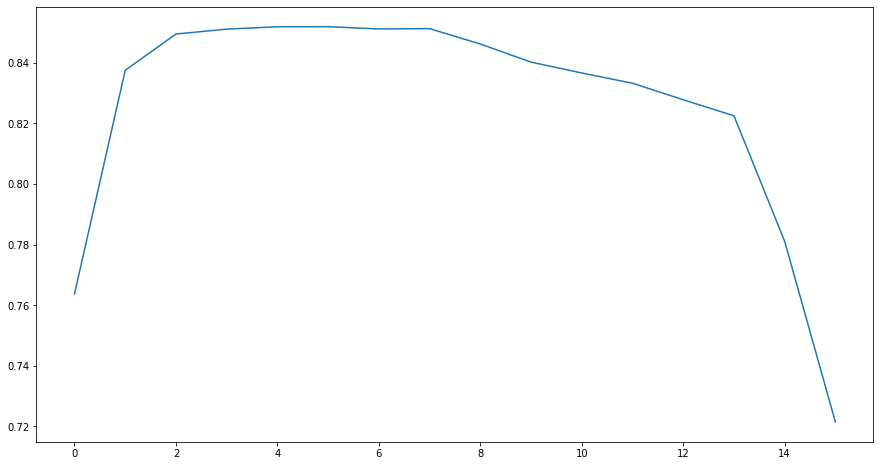

In [157]:
score_sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
score_sfs_df
plt.figure(figsize=(15,8))
plt.plot(range(nfeatures),score_sfs_df['avg_score'])
plt.show()

In [158]:
score_sfs_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.43858619335088256, 1.0, 1.0, 0.650223563566...",0.763755,"(euribor3m,)",0.276496,0.215123,0.107561
2,"(4, 8)","[0.8327250951583263, 1.0, 0.9764551346394537, ...",0.837514,"(contact, euribor3m)",0.178656,0.139001,0.0695
3,"(4, 8, 9)","[0.8327250951583263, 1.0, 0.978826519404236, 0...",0.849478,"(contact, euribor3m, pdays_mod)",0.165915,0.129088,0.064544
4,"(4, 8, 9, 13)","[0.8442061786312554, 0.9999999999999999, 0.978...",0.851087,"(contact, euribor3m, pdays_mod, education_tgt)",0.166485,0.129531,0.064766
5,"(4, 8, 9, 13, 15)","[0.8461494177619845, 1.0, 0.978826519404236, 0...",0.851871,"(contact, euribor3m, pdays_mod, education_tgt,...",0.166095,0.129228,0.064614
6,"(2, 4, 8, 9, 13, 15)","[0.8479854203446923, 1.0, 0.978826519404236, 0...",0.851897,"(housing, contact, euribor3m, pdays_mod, educa...",0.166351,0.129427,0.064713
7,"(2, 3, 4, 8, 9, 13, 15)","[0.8465264388887133, 1.0, 0.978826519404236, 0...",0.851153,"(housing, loan, contact, euribor3m, pdays_mod,...",0.166452,0.129505,0.064753
8,"(2, 3, 4, 6, 8, 9, 13, 15)","[0.8426179489147663, 1.0, 0.978826519404236, 0...",0.851255,"(housing, loan, contact, cons.price.idx, eurib...",0.165682,0.128906,0.064453
9,"(2, 3, 4, 5, 6, 8, 9, 13, 15)","[0.843574047400812, 1.0, 0.951184396851522, 0....",0.846182,"(housing, loan, contact, previous, cons.price....",0.160524,0.124893,0.062446
10,"(1, 2, 3, 4, 5, 6, 8, 9, 13, 15)","[0.81448641595138, 1.0, 0.9491870262159121, 0....",0.8402,"(default, housing, loan, contact, previous, co...",0.161408,0.125581,0.062791


### Backward Selection

In [159]:
nfeatures = 1
sbs = SFS(LogisticRegression(), k_features=nfeatures, forward=False, verbose=2, scoring = 'roc_auc', cv = 5, n_jobs=-1)
# sbs = SFS(RandomForestClassifier(n_estimators=10, max_depth=20, criterion='gini'), 
#           k_features=nfeatures, forward=False, verbose=2, scoring = 'roc_auc', cv = 5, n_jobs=-1)
sbs.fit(data, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logi

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          n_jobs=-1, scoring='roc_auc', verbose=2)

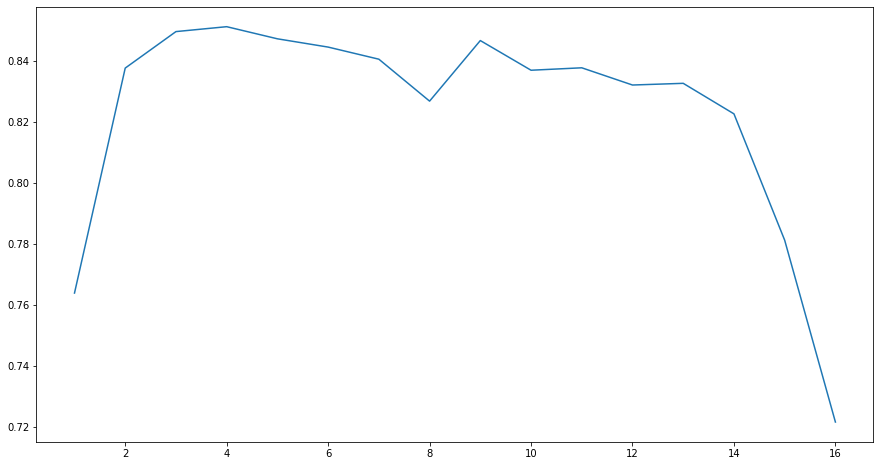

In [160]:
score_sbs_df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
score_sbs_df
plt.figure(figsize=(15,8))
plt.plot(range(16,0,-1),score_sbs_df['avg_score'])
plt.show()

In [161]:
score_sbs_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8205385080799917, 0.8911585087651113, 0.824...",0.72147,"(age, default, housing, loan, contact, previou...",0.246425,0.191727,0.095864
15,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8158268728016508, 0.8954101031129917, 0.884...",0.781086,"(default, housing, loan, contact, previous, co...",0.17903,0.139291,0.069646
14,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15)","[0.8026401638122931, 0.9575899520878888, 0.874...",0.822505,"(default, housing, loan, contact, previous, co...",0.136486,0.10619,0.053095
13,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15)","[0.8127847412551417, 0.9148689767671886, 0.932...",0.832517,"(default, housing, loan, contact, previous, co...",0.124171,0.09661,0.048305
12,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15)","[0.8097375300826737, 0.9722001606458277, 0.916...",0.831961,"(housing, loan, contact, previous, cons.price....",0.155938,0.121325,0.060662
11,"(3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15)","[0.8066632275717581, 0.9592516112461092, 0.931...",0.837608,"(loan, contact, previous, cons.price.idx, cons...",0.145079,0.112876,0.056438
10,"(4, 5, 6, 7, 8, 9, 10, 11, 13, 15)","[0.8322447883037661, 0.9794089450210496, 0.885...",0.836809,"(contact, previous, cons.price.idx, cons.conf....",0.133607,0.103951,0.051976
9,"(4, 5, 6, 7, 8, 9, 10, 11, 13)","[0.8193809177642422, 0.9856500241644671, 0.931...",0.84654,"(contact, previous, cons.price.idx, cons.conf....",0.150223,0.116878,0.058439
8,"(4, 5, 6, 7, 8, 9, 10, 13)","[0.7481910887557399, 0.9709823616288541, 0.945...",0.826681,"(contact, previous, cons.price.idx, cons.conf....",0.143491,0.111641,0.055821
7,"(4, 5, 6, 8, 9, 10, 13)","[0.8055152321050422, 0.9968974852056007, 0.943...",0.840428,"(contact, previous, cons.price.idx, euribor3m,...",0.152835,0.118911,0.059455


### Features Selected

In [162]:
# # [list(i) for i in score_sfs_df[score_sfs_df['avg_score'] == score_sfs_df['avg_score'].max()]['feature_names']][0]
# if score_sfs_df['avg_score'].max() >= score_sbs_df['avg_score'].max():
#     features_selected = score_sfs_df[score_sfs_df['avg_score'] == score_sfs_df['avg_score'].max()]['feature_names']
# else:
#     features_selected = score_sbs_df[score_sbs_df['avg_score'] == score_sbs_df['avg_score'].max()]['feature_names']
# features_selected = [list(i) for i in features_selected][0]
# features_selected

In [163]:
# The result of backward selection is better than forward
# We decided to keep 10 features
features_selected = list(score_sbs_df.loc[10,'feature_names'])
features_selected
# ['default',
#  'housing',
#  'contact',
#  'previous',
#  'cons.price.idx',
#  'cons.conf.idx',
#  'euribor3m',
#  'pdays_mod',
#  'marital_tgt',
#  'day_of_week_tgt']

['contact',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'pdays_mod',
 'campaign_cap',
 'job_tgt',
 'education_tgt',
 'day_of_week_tgt']

In [164]:
# After feature selection, the correlation decreased 
plot_correlation(pd.concat([data[features_selected],Y],axis=1))

In [165]:
# According to the VIF, there is no multicollinearity any more
X = add_constant(data[features_selected])
pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns, columns=['VIF'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,VIF
const,55781.706485
contact,1.501665
previous,1.867573
cons.price.idx,2.430644
cons.conf.idx,1.279361
euribor3m,2.549701
pdays_mod,1.718646
campaign_cap,1.033642
job_tgt,1.109262
education_tgt,1.017642


In [166]:
data[features_selected]

,contact,previous,cons.price.idx,cons.conf.idx,euribor3m,pdays_mod,campaign_cap,job_tgt,education_tgt,day_of_week_tgt
8,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.108248,0.113657,0.099483
9,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.081381,0.112795,0.099483
11,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.081381,0.112795,0.099483
12,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.068840,0.112795,0.099483
19,1.0,0.0,93.994,-36.4,4.857,-99.0,1.0,0.112175,0.076473,0.099483
...,...,...,...,...,...,...,...,...,...,...
41094,0.0,1.0,94.767,-50.8,1.048,-99.0,1.0,0.318233,0.076473,0.116671
41098,0.0,3.0,94.767,-50.8,1.050,3.0,1.0,0.318233,0.112795,0.121188
41134,0.0,0.0,94.767,-50.8,1.041,-99.0,1.0,0.318233,0.112795,0.121188
41171,1.0,0.0,94.767,-50.8,1.031,-99.0,1.0,0.318233,0.113657,0.121188


## Model Building

### Model Using sklearn

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features_selected], Y, test_size = 0.2, random_state = 101)

In [168]:
X_train_store = X_train.copy()
y_train_store = y_train.copy()
X_test_store = X_test.copy()
y_test_store = y_test.copy()

In [169]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# # Standardizing manually, as we only need to standardize some features
# cols = ['previous','euribor3m','pdays_mod','campaign_cap','marital_tgt','education_tgt','month_tgt']
# for i in cols:
#     X_train[i] = (X_train[i] - X_train[i].mean())/ X_train[i].std()
#     X_test[i] = (X_test[i] - X_train[i].mean())/ X_train[i].std()
# X_train.head()

In [170]:
results_train = y_train.copy()
results_train.columns = ['y_actual']
results_test = y_test.copy()
results_test.columns = ['y_actual']

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [171]:
results_train

,y_actual
13730,0.0
16300,0.0
7936,0.0
38155,1.0
34847,0.0
...,...
3349,0.0
25101,0.0
33806,0.0
7072,0.0


In [172]:
X_train.shape

(10351, 10)

In [173]:
X_test.shape

(2588, 10)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [175]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict_proba(X_test)[:,1]

LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
LOGCV

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConv

0.8593373408258046

In [176]:
results_train['logreg'] = logmodel.predict_proba(X_train)[:,1]
results_test['logreg'] = logpred

In [177]:
results_train.head(10)

,y_actual,logreg
13730,0.0,0.038455
16300,0.0,0.011236
7936,0.0,0.043818
38155,1.0,0.397014
34847,0.0,0.086506
39525,0.0,0.550318
6418,0.0,0.051499
32353,0.0,0.140637
18385,0.0,0.051405
22898,0.0,0.077988


In [178]:
results_train[results_train['y_actual']==1].mean()

y_actual    1.000000
logreg      0.338042
dtype: float64

In [179]:
results_train[results_train['y_actual']==0].mean()

y_actual    0.000000
logreg      0.126614
dtype: float64

In [180]:
results_test.head(10)

,y_actual,logreg
30092,1.0,0.186218
30950,0.0,0.078878
19415,0.0,0.084862
39784,1.0,0.492881
38285,0.0,0.328452
14280,0.0,0.046205
19640,0.0,0.065485
40699,1.0,0.748732
39783,0.0,0.505053
14107,0.0,0.050713


In [181]:
models = pd.DataFrame({'Models': ['Logistic Model'],
                       'Accuracy':  [LOGCV]})
models.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
0,Logistic Model,0.859337


In [182]:
modelNameDict={
    "Logistic Regression": 'logreg' 
}
modelDict={
    "Logistic Regression": logmodel
}
modelScoreDict={
    "Logistic Regression": LOGCV
}

model_scores=pd.DataFrame.from_dict(modelScoreDict,orient='index')
model_scores.columns=['Accuracy']
model_scores.sort_values('Accuracy',ascending=False)

,Accuracy
Logistic Regression,0.859337


In [183]:
from sklearn import metrics

def draw_auc_curve(ax, model_name, modelNameDict, results):
    preds=results[modelNameDict[model_name]]
    y=results['y_actual']
    fpr, tpr, threshold = metrics.roc_curve(y,preds)
    roc_auc=metrics.auc(fpr,tpr)
    
    ax.plot(fpr,tpr,'b',label=f"AUC={roc_auc:.3f}")
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title(f"ROC {model_name}",fontsize=20)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.legend(loc = 'lower right', prop={'size': 16})

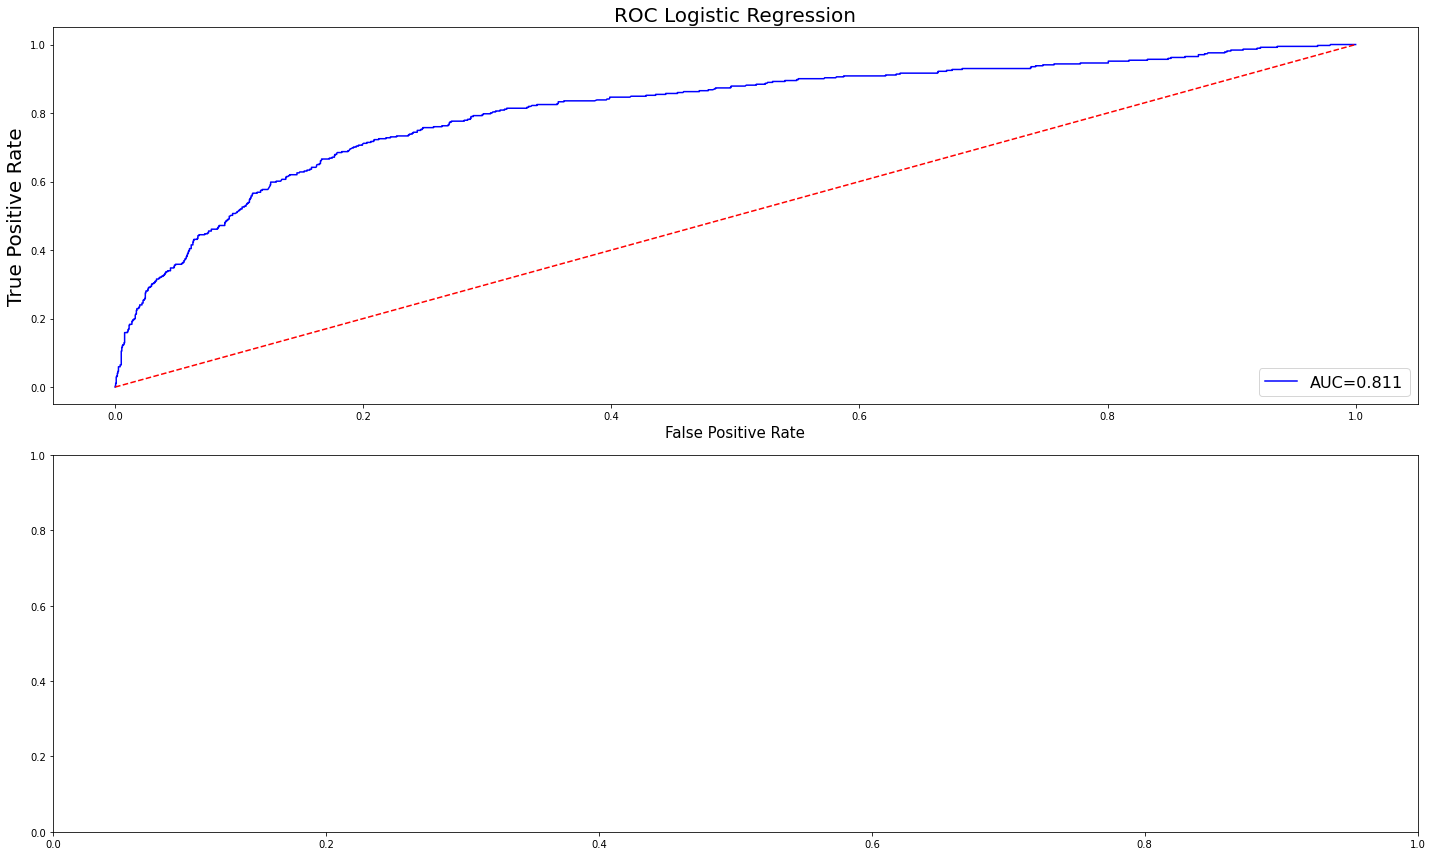

In [184]:
n_col=1
n_row=2

fig, ax_arr = plt.subplots(nrows = n_row, ncols = n_col, figsize = (20,n_row*6))
for i, (model_name,model) in enumerate(modelDict.items()):
    draw_auc_curve(ax_arr[0], model_name, modelNameDict, results_test)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

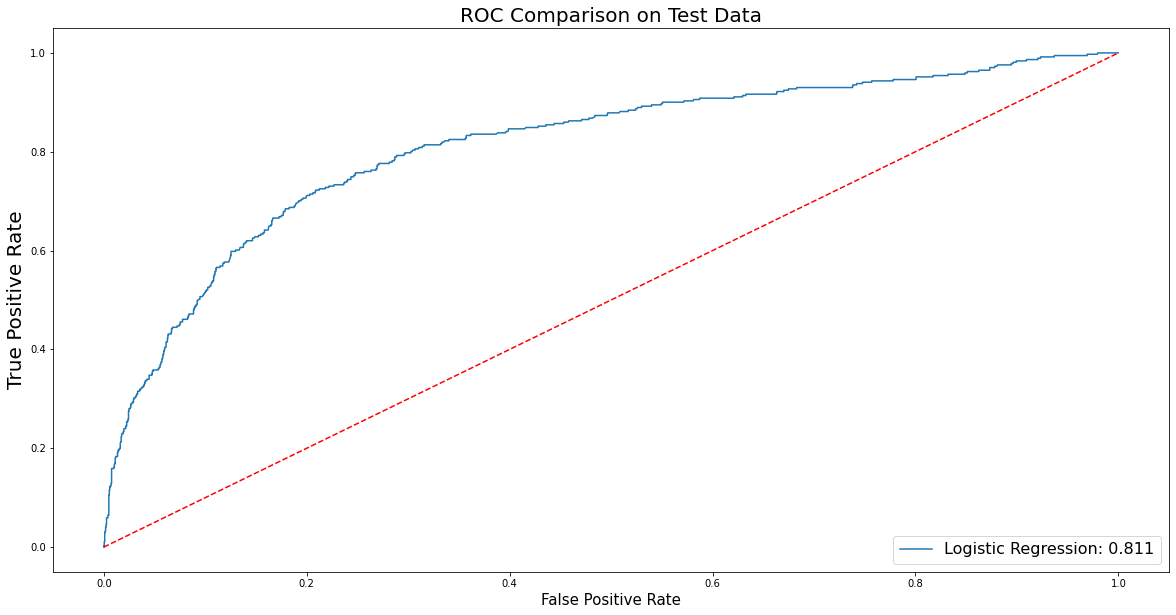

In [185]:
plt.figure(figsize=(20,10))
for model_name, col_name in modelNameDict.items():
    preds=results_test[col_name]
    fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
    roc_auc=metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f"{model_name}: {roc_auc:.3f}")

plt.plot([0, 1], [0, 1],'r--')
ax=plt.gca()
ax.set_title("ROC Comparison on Test Data",fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.show()

In [186]:
print("Train set response rate:", y_train.mean().values[0])
print("Test set response rate:", y_test.mean().values[0])

Train set response rate: 0.1605641966959714
Test set response rate: 0.14335394126738796


In [187]:
# This cell builds the lift tables for the report
def generate_summary(y_actual_sorted, num_bins, cost_per_contact, revenue_per_good):
    cols = ['tot recs','bin recs','#g','#b','%g','%b','cg','cb','%cg','%cb','KS',
            'bin resp rate','cum resp rate','bin lift','cum lift','cost','revenue','profit']
    df = pd.DataFrame(index=range(1,num_bins+1), columns = cols)

    chunk=round(len(y_actual_sorted)/num_bins)
    tot_goods=sum(y_actual_sorted)
    tot_bads=len(y_actual_sorted)-sum(y_actual_sorted)
    avg_resp_rate=y_actual_sorted.mean()*100

    bins=[]
    goods=[]
    for i in range(num_bins):
        if i==num_bins-1:
            cur_bin=y_actual_sorted[i*chunk:]
        else:
            cur_bin=y_actual_sorted[i*chunk:(i+1)*chunk]
        bins.append(len(cur_bin))
        goods.append(sum(cur_bin))

    df['bin recs']=bins
    df['tot recs']=df['bin recs'].cumsum()
    df['#g']=goods
    df['#b']=df['bin recs']-df['#g']
    df['%g']=df['#g']/df['bin recs']*100
    df['%b']=100-df['%g']
    df['cg']=df['#g'].cumsum()
    df['cb']=df['#b'].cumsum()
    df['%cg']=df['cg']/tot_goods*100
    df['%cb']=df['cb']/tot_bads*100
    df['KS']=df['%cg']-df['%cb']
    df['bin resp rate']=df['%g']
    df['cum resp rate']=df['cg']/df['tot recs']*100
    df['bin lift']=df['bin resp rate']/avg_resp_rate
    df['cum lift']=df['cum resp rate']/avg_resp_rate
    df['cost']=cost_per_contact*df['tot recs']
    df['revenue']=revenue_per_good*df['cg']
    df['profit']=df['revenue']-df['cost']
    df.index.name='bin'
    df=df.reset_index()
    return df

In [188]:
results_train['rand'] = np.random.randint(0,100,results_train.shape[0])/100
print(results_train.shape)
results_train.head()

(10351, 3)


,y_actual,logreg,rand
13730,0.0,0.038455,0.04
16300,0.0,0.011236,0.95
7936,0.0,0.043818,0.83
38155,1.0,0.397014,0.42
34847,0.0,0.086506,0.74


In [189]:
results_test['rand'] = np.random.randint(0,100,results_test.shape[0])/100
print(results_test.shape)
results_test.head()

(2588, 3)


,y_actual,logreg,rand
30092,1.0,0.186218,0.06
30950,0.0,0.078878,0.94
19415,0.0,0.084862,0.45
39784,1.0,0.492881,0.92
38285,0.0,0.328452,0.21


In [190]:
# calculate train and test ks scores for all models
from scipy.stats import ks_2samp

ks_df = pd.DataFrame()
ks_df['col'] = list(results_test[results_test.columns])[:]
ks_df['train_ks_score'] = ''
ks_df['test_ks_score'] = ''

for i in range(len(ks_df)):
    ks_df['train_ks_score'][i] = ks_2samp(results_train[results_train['y_actual'] == 0][ks_df['col'][i]], results_train[results_train['y_actual'] == 1][ks_df['col'][i]])[0]

for i in range(len(ks_df)):
    ks_df['test_ks_score'][i] = ks_2samp(results_test[results_test['y_actual'] == 0][ks_df['col'][i]], results_test[results_test['y_actual'] == 1][ks_df['col'][i]])[0]

ks_df.head(20)

,col,train_ks_score,test_ks_score
0,y_actual,1.0,1.0
1,logreg,0.479525,0.513531
2,rand,0.030492,0.032935


In [191]:
# set some practical business $ values for the campaign
cost_per_contact = 6
revenue_per_good = 40
num_bins=100

summary_tbs_trn={}
summary_tbs_tst={}
cols_eval = modelNameDict.values()
for col_eval in cols_eval:
    y_train_sorted=results_train.sort_values(col_eval,ascending=False)['y_actual'].values
    summary_tbs_trn[col_eval]=generate_summary(y_train_sorted, num_bins, cost_per_contact, revenue_per_good)

    y_test_sorted=results_test.sort_values(col_eval,ascending=False)['y_actual'].values
    summary_tbs_tst[col_eval]=generate_summary(y_test_sorted, num_bins, cost_per_contact, revenue_per_good)

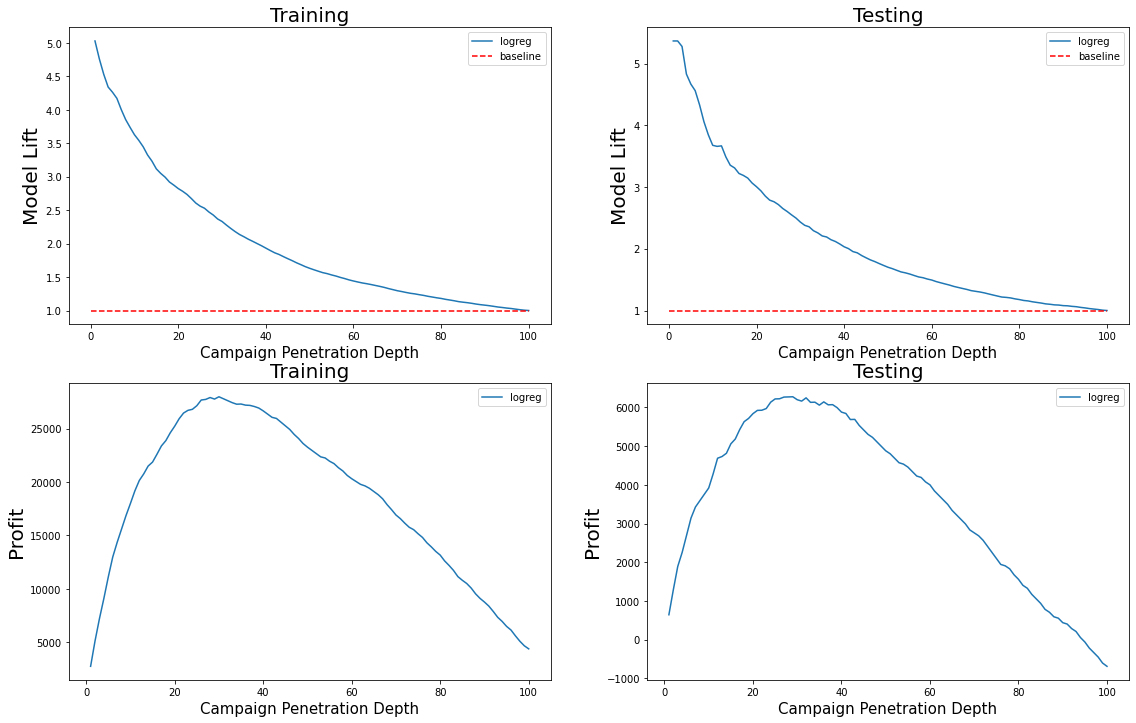

In [192]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (19,12))

for col_eval in cols_eval:
    temp1=summary_tbs_trn[col_eval]
    ax1.plot(temp1['bin'],temp1['cum lift'],label=col_eval)
    
    temp2=summary_tbs_tst[col_eval]
    ax2.plot(temp2['bin'],temp2['cum lift'],label=col_eval)
    
    temp3=summary_tbs_trn[col_eval]
    ax3.plot(temp3['bin'],temp3['profit'],label=col_eval)
    
    temp4=summary_tbs_tst[col_eval]
    ax4.plot(temp4['bin'],temp4['profit'],label=col_eval)
    
ax1.plot([0, 100], [1, 1],'r--',label='baseline')
ax1.legend()
ax1.set_title('Training',fontsize=20)
ax1.set_ylabel('Model Lift',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax2.plot([0, 100], [1, 1],'r--',label='baseline')
ax2.legend()
ax2.set_title('Testing',fontsize=20)
ax2.set_ylabel('Model Lift',fontsize=20)
ax2.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax3.set_title('Training',fontsize=20)
ax3.set_ylabel('Profit',fontsize=20)
ax3.set_xlabel('Campaign Penetration Depth',fontsize=15)
ax3.legend()

ax4.set_title('Testing',fontsize=20)
ax4.set_ylabel('Profit',fontsize=20)
ax4.set_xlabel('Campaign Penetration Depth',fontsize=15)
ax4.legend()

plt.show()

In [193]:
ith_bin=20
model_summary=pd.DataFrame(index=cols_eval,columns=['max_profit',f'{ith_bin}th_bin_lift'])

for col_eval in cols_eval:
    temp=summary_tbs_tst[col_eval]
    model_summary.loc[col_eval,:]=[temp['profit'].max(),
                                   temp[temp['bin']==ith_bin]['cum lift'].values[0]]

model_summary.sort_values('max_profit',ascending=False)

,max_profit,20th_bin_lift
logreg,6276.0,3.004935


In [194]:
col_eval='logreg'
lift_trn=summary_tbs_trn[col_eval]
lift_tst=summary_tbs_tst[col_eval]
lift_tst.to_csv('lift_table_test.csv')
lift_tst.head(10)

,bin,tot recs,bin recs,#g,#b,%g,%b,cg,cb,%cg,%cb,KS,bin resp rate,cum resp rate,bin lift,cum lift,cost,revenue,profit
0,1,26,26,20.0,6.0,76.923077,23.076923,20.0,6.0,5.390836,0.270636,5.120200,76.923077,76.923077,5.365955,5.365955,156,800.0,644.0
1,2,52,26,20.0,6.0,76.923077,23.076923,40.0,12.0,10.781671,0.541272,10.240399,76.923077,76.923077,5.365955,5.365955,312,1600.0,1288.0
2,3,78,26,19.0,7.0,73.076923,26.923077,59.0,19.0,15.902965,0.857014,15.045951,73.076923,75.641026,5.097657,5.276522,468,2360.0,1892.0
3,4,104,26,13.0,13.0,50.000000,50.000000,72.0,32.0,19.407008,1.443392,17.963616,50.000000,69.230769,3.487871,4.829359,624,2880.0,2256.0
4,5,130,26,15.0,11.0,57.692308,42.307692,87.0,43.0,23.450135,1.939558,21.510577,57.692308,66.923077,4.024466,4.668381,780,3480.0,2700.0
5,6,156,26,15.0,11.0,57.692308,42.307692,102.0,54.0,27.493261,2.435724,25.057538,57.692308,65.384615,4.024466,4.561062,936,4080.0,3144.0
6,7,182,26,11.0,15.0,42.307692,57.692308,113.0,69.0,30.458221,3.112314,27.345907,42.307692,62.087912,2.951275,4.331092,1092,4520.0,3428.0
7,8,208,26,8.0,18.0,30.769231,69.230769,121.0,87.0,32.614555,3.924222,28.690333,30.769231,58.173077,2.146382,4.058003,1248,4840.0,3592.0
8,9,234,26,8.0,18.0,30.769231,69.230769,129.0,105.0,34.770889,4.736130,30.034760,30.769231,55.128205,2.146382,3.845601,1404,5160.0,3756.0
9,10,260,26,8.0,18.0,30.769231,69.230769,137.0,123.0,36.927224,5.548038,31.379186,30.769231,52.692308,2.146382,3.675679,1560,5480.0,3920.0


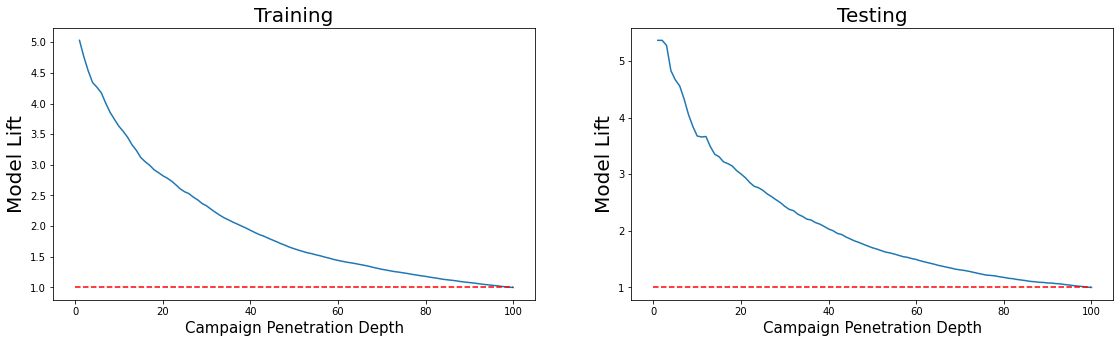

In [195]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['cum lift'])
ax.plot([0, 100], [1, 1],'r--')
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Model Lift',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['cum lift'])
ax1.plot([0, 100], [1, 1],'r--')
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Model Lift',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

plt.show()

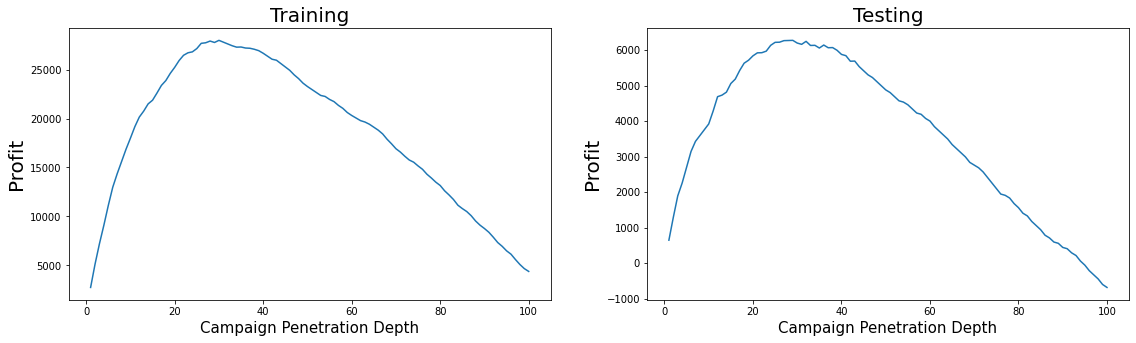

In [196]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (19,5))

ax.plot(lift_trn['bin'], lift_trn['profit'])
ax.set_title('Training',fontsize=20)
ax.set_ylabel('Profit',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=15)

ax1.plot(lift_tst['bin'], lift_tst['profit'])
ax1.set_title('Testing',fontsize=20)
ax1.set_ylabel('Profit',fontsize=20)
ax1.set_xlabel('Campaign Penetration Depth',fontsize=15)

plt.show()

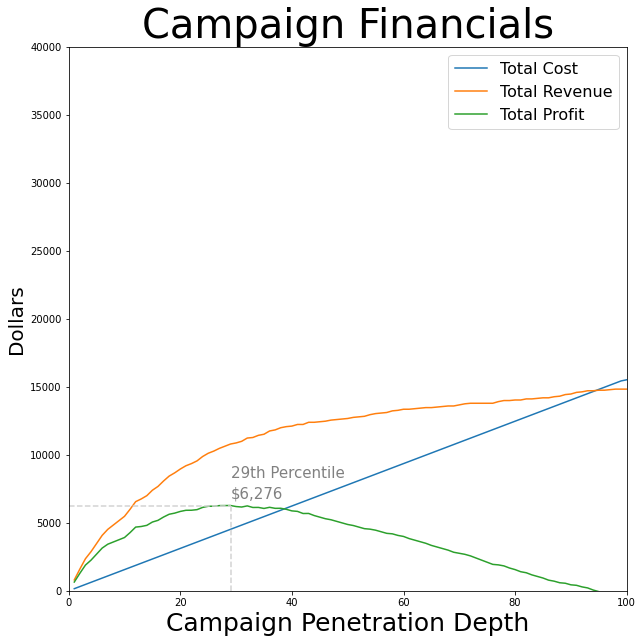

In [197]:
max_profit=lift_tst['profit'].max()
best_bin=lift_tst[lift_tst['profit']==max_profit]['bin'].values[0]

fig, ax = plt.subplots(figsize = (10,10))

ax.plot(lift_tst['bin'], lift_tst['cost'],label='Total Cost')
ax.plot(lift_tst['bin'], lift_tst['revenue'],label='Total Revenue')
ax.plot(lift_tst['bin'], lift_tst['profit'],label='Total Profit')
ax.plot([best_bin,best_bin],[0,max_profit],color='lightgrey',linestyle='--')
ax.plot([0,best_bin],[max_profit,max_profit],color='lightgrey',linestyle='--')
ax.annotate(f"${max_profit:,.0f}",[best_bin,max_profit+500],fontsize=15,color='grey')
ax.annotate(f"{best_bin}th Percentile",[best_bin,max_profit+2000],fontsize=15,color='grey')
ax.set_title('Campaign Financials',fontsize=40)
ax.set_ylabel('Dollars',fontsize=20)
ax.set_xlabel('Campaign Penetration Depth',fontsize=25)
ax.set_xlim(0,100)
ax.set_ylim(0,40000)
ax.legend(loc = 'upper right', prop={'size': 16})
plt.savefig('financials.png')

In [198]:
ith_bin=20

print('Best model is',col_eval)
print(f"\tMaximum profit is ${lift_tst['profit'].max():,.1f}",)
print(f"\tLift at the {ith_bin}th bin is {lift_tst[lift_tst['bin']==ith_bin]['cum lift'].values[0]:.2f}")

Best model is logreg
	Maximum profit is $6,276.0
	Lift at the 20th bin is 3.00


In [199]:
results_train.sort_values(by='logreg', ascending=False)

,y_actual,logreg,rand
40741,1.0,0.885082,0.67
40559,1.0,0.875599,0.85
40210,1.0,0.875593,0.91
40466,1.0,0.874913,0.20
39340,1.0,0.870798,0.40
...,...,...,...
13447,0.0,0.008232,0.13
17988,0.0,0.007910,0.33
18821,0.0,0.007565,0.34
15580,0.0,0.006297,0.93


In [200]:
round(results_train.shape[0] * 0.40)

4140

In [201]:
a = results_train.copy()
a = a.sort_values(by='logreg', ascending=False)
a.reset_index(inplace=True, drop=True)
a.iloc[round(results_train.shape[0] * 0.40)-5:round(results_train.shape[0] * 0.45)+5,:]

,y_actual,logreg,rand
4135,0.0,0.118765,0.62
4136,0.0,0.118688,0.11
4137,0.0,0.118598,0.14
4138,0.0,0.118336,0.41
4139,0.0,0.118319,0.28
...,...,...,...
4658,0.0,0.088673,0.66
4659,0.0,0.088655,0.97
4660,0.0,0.088649,0.00
4661,0.0,0.088574,0.45


In [202]:
a.iloc[1000,:]

y_actual    1.000000
logreg      0.413357
rand        0.710000
Name: 1000, dtype: float64

In [203]:
to_show = pd.concat([X_train_store, results_train[['y_actual','logreg']]],axis=1).sort_values(by='logreg',ascending=False).iloc[8:,:]
to_show.index.name = 'Client ID'
to_show

,contact,previous,cons.price.idx,cons.conf.idx,euribor3m,pdays_mod,campaign_cap,job_tgt,education_tgt,day_of_week_tgt,y_actual,logreg
Client ID,,,,,,,,,,,,
40573,0.0,1.0,94.199,-37.5,0.886,5.0,3.0,0.318233,0.112795,0.116671,1.0,0.856714
39727,0.0,1.0,93.876,-40.0,0.697,12.0,2.0,0.318233,0.112795,0.117800,1.0,0.856195
39576,0.0,1.0,93.876,-40.0,0.668,6.0,1.0,0.318233,0.112795,0.117800,1.0,0.856004
39336,0.0,1.0,93.369,-34.8,0.637,9.0,1.0,0.318233,0.112795,0.117800,1.0,0.855116
40759,0.0,1.0,94.199,-37.5,0.879,13.0,5.0,0.318233,0.082024,0.121188,1.0,0.854590
...,...,...,...,...,...,...,...,...,...,...,...,...
13447,1.0,0.0,93.918,-42.7,4.962,-99.0,20.0,0.108248,0.137336,0.116671,0.0,0.008232
17988,1.0,0.0,93.918,-42.7,4.961,-99.0,20.0,0.085165,0.137336,0.117800,0.0,0.007910
18821,1.0,0.0,93.918,-42.7,4.968,-99.0,20.0,0.068840,0.109469,0.121188,0.0,0.007565


In [204]:
logmodel.coef_

array([[-0.35918501, -0.2352905 ,  0.38194848,  0.23728516, -1.00349684,
         0.39763365, -0.20612692,  0.17820267,  0.03403501,  0.11529595]])

In [205]:
feature_imp = pd.DataFrame()
feature_imp['Features Name'] = to_show.columns[:10]
feature_imp['Coefficient'] = pd.Series(logmodel.coef_[0])
feature_imp['abs_value'] = feature_imp['Coefficient'].apply(lambda x: abs(x))
feature_imp.sort_values(by='abs_value',ascending=False)[['Features Name', 'Coefficient']]

,Features Name,Coefficient
4,euribor3m,-1.003497
5,pdays_mod,0.397634
2,cons.price.idx,0.381948
0,contact,-0.359185
3,cons.conf.idx,0.237285
1,previous,-0.235290
6,campaign_cap,-0.206127
7,job_tgt,0.178203
9,day_of_week_tgt,0.115296
8,education_tgt,0.034035


### Model Using statsmodels

In [206]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# y_sm = pd.concat([y_train, y_test])
# X_sm = pd.concat([pd.DataFrame(X_train,columns=features_selected, index=X_train_store.index), 
#                   pd.DataFrame(X_test,columns=features_selected, index=X_test_store.index)])
y_sm = y_train
X_sm = pd.DataFrame(X_train,columns=features_selected, index=X_train_store.index)
X_sm = add_constant(X_sm)
# X_sm.drop(['housing_tgt','default_tgt', 'education_tgt'],axis=1,inplace=True)  # these three features are not siginificant
logit_model=sm.Logit(y_sm, X_sm)
result_sm = logit_model.fit()
print(result_sm.summary2())  # the coefficient results are similar, a little difference due to regularization of sklearn 

y_scores = result_sm.predict(add_constant(pd.DataFrame(X_test,columns=features_selected, index=X_test_store.index)))
y_pred = (y_scores >0.5).astype(int)
accuracy_score(y_test, y_pred)  # the accuracy result is also similar 

# A rule of thumb that I found to be quite helpful is that a McFadden's pseudo R2 ranging from 0.2 to 0.4 indicates very good model fit.
# As such, the model mentioned above with a McFadden's pseudo R2 of 0.199 is likely a good model, at least by this metric.
# Perhaps not the best one, we can use some more complext and fine-tuning models like Randomforest, 
# XGBoost, Neural Network to improve the prediction results, but I'm afraid that this is out of scope for this class

# Cited by Alexis: https://stats.stackexchange.com/questions/82105/mcfaddens-pseudo-r2-interpretation#:~:text=A%20rule%20of%20thumb%20that,isn't%20particularly%20strong%20either.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Optimization terminated successfully.
         Current function value: 0.352472
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.200    
Dependent Variable: label            AIC:              7318.8812
Date:               2022-05-09 22:29 BIC:              7398.5744
No. Observations:   10351            Log-Likelihood:   -3648.4  
Df Model:           10               LL-Null:          -4560.7  
Df Residuals:       10340            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -2.0466   0.0366 -55.9823 0.0000 -2.1182 -1.9749
contact         -0.3599   0.0422  -8.5262 0.0000 -0.4427 -0.2772
previous     

0.8736476043276662

In [207]:
# fit on all data
y_sm = pd.concat([y_train, y_test])
X_sm = pd.concat([pd.DataFrame(X_train,columns=features_selected, index=X_train_store.index),
                  pd.DataFrame(X_test,columns=features_selected, index=X_test_store.index)])
X_sm = add_constant(X_sm)
# X_sm.drop(['housing','loan', 'education_tgt'],axis=1,inplace=True)  # these three features are not siginificant
logit_model=sm.Logit(y_sm, X_sm)
result_sm = logit_model.fit()
print(result_sm.summary2())  # the coefficient results are similar, a little difference due to regularization of sklearn 

y_scores = result_sm.predict(X_sm)
y_pred = (y_scores >0.5).astype(int)
accuracy_score(y_sm, y_pred)  # in-sample accuracy

Optimization terminated successfully.
         Current function value: 0.346128
         Iterations 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.204    
Dependent Variable: label            AIC:              8979.1016
Date:               2022-05-09 22:29 BIC:              9061.2496
No. Observations:   12939            Log-Likelihood:   -4478.6  
Df Model:           10               LL-Null:          -5626.7  
Df Residuals:       12928            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -2.0840   0.0332 -62.6795 0.0000 -2.1492 -2.0188
contact         -0.3448   0.0381  -9.0528 0.0000 -0.4195 -0.2702
previous        -0.2128   0.0298  -7.1352 0.0000 -0.2712 -0.1543
cons.price.idx   0.3562   0.0333  10.7004 0.0000  

0.8631269804467115